# Индивидуальное задание
<font size="4">Считать цветное изображение изображение и выполнить:
    
1. Провести охват изображения в прямоугольник, повернуть изображение так, чтобы площадь этого прямоугольника была минимальной
2. "Обрезать" изображение по минимальному квадрату
3. Провести охват изображения в круг

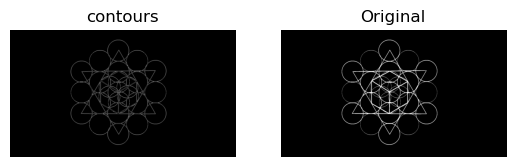

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения и нахождение его контура
img = cv2.imread('rrround.jpg', 0) 
ret,thresh = cv2.threshold(img,128,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

cont = np.zeros_like(img)
cv2.drawContours(cont, contours, -1, 255, 1)

plt.subplot(121)
plt.title('contours')
plt.axis('off')
plt.imshow(cont, cmap='gray');

mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, 255, -1) 

plt.subplot(122)
plt.title('Original')
plt.axis('off')
plt.imshow(mask, cmap='gray');

<font size="4">Проведем охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной.

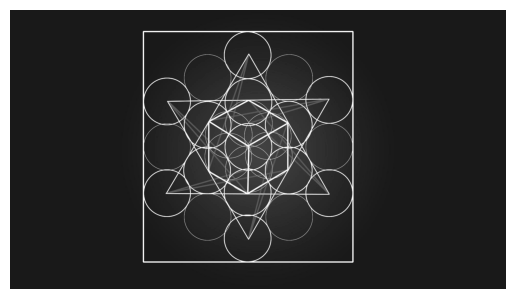

In [65]:
cnt = contours[0]
rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)
box = np.int0(box)

imp = cv2.drawContours(img, [box], 0,255, 4)

plt.axis('off')
plt.imshow(imp, cmap='gray');

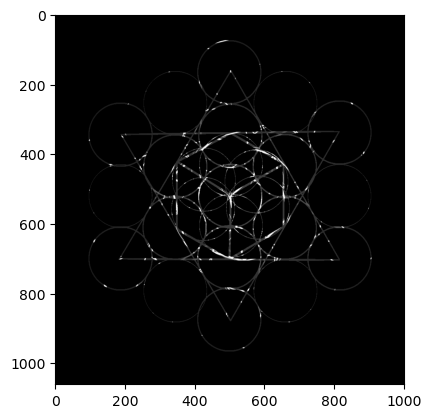

In [71]:
out = np.zeros_like(dst)
out[mask == 255] = dst[mask == 255]

(y, x) = np.where(mask == 255)
min_y = np.min(contours[0],  axis=0)[0][1]
min_x = np.min(contours[0],  axis=0)[0][0]
max_y = np.max(contours[0],  axis=0)[0][1]
max_x = np.max(contours[0],  axis=0)[0][0]

out = out[min_y:max_y+1, min_x:max_x+1]

#plt.axis('off')
plt.imshow(out, cmap='gray');

<font size="4"> Обрежем изображение по контуру

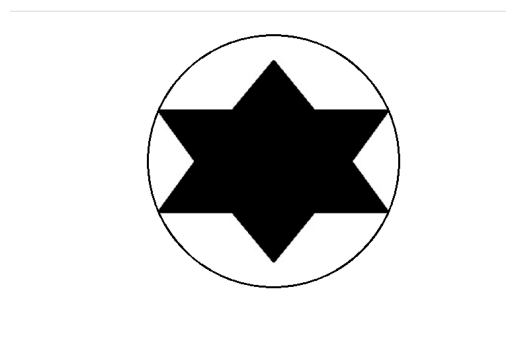

In [115]:
image = cv2.imread('bin.png',0)

ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)

cnt = contours[0]

(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)

imp = cv2.circle(image,center,radius,(0,255,0),2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imp);